#  Requêter via des API avec Python




<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=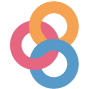)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)

Petite revue d'[API REST](https://fr.wikipedia.org/wiki/Representational_state_transfer).

## Définition :  

API, à part que ce mot qui vaut 5 au scrabble, c'est quoi au juste ?

API signifie *Application Programming Interface*. Le mot le plus important est “interface”, et c’est le mot le plus simple, car nous utilisons tous des interfaces.

Bon, et une interface ?

> Définition Larousse : "Une interface est un dispositif qui permet des échanges et interactions entre différents acteurs"

Pour faire simple, une API est un moyen efficace de faire communiquer entre elles deux applications : concrètement, un fournisseur de service met à disposition des développeurs une interface codifiée, qui leur permet d'obtenir des informations à partir de requêtes.

Sans rentrer dans le détail technique, le dialogue ressemble à : "envoie moi ton adresse sous la forme X = rue, Y = Ville, Z = Pays" et moi, en retour, je t'enverrai le code à afficher sur ton site pour avoir la carte interactive.


## Les API qui existent

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux. 

Pour en citer quelques-uns très connus : 

- Twitter : https://dev.twitter.com/rest/public
- Facebook : https://developers.facebook.com/
- Instagram : https://www.instagram.com/developer/
- Spotify : https://developer.spotify.com/web-api/

Ou encore : 

- Pole Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
- SNCF : https://data.sncf.com/api
- Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589

pour beaucoup d'entre elles, il faut créer un compte utilisateur afin de pouvoir accéder aux données (c'est notamment le cas pour les réseaux sociaux). Nous regarderons en cours seulement les API ouvertes sans restriction d'accès.  

## Comment parler à une API ?

La plupart des API donnent des exemples pour communiquer avec les données présentes sur le site.

Il s'agit tout simplement de trouver l'url qui renvoie les données que vous souhaitez avoir.

Par exemple, avec l'API de la Banque mondiale, voici comme s'écrit une requête : 

http://api.worldbank.org/v2/countries?incomeLevel=LMC

Avec cette url, on demande la liste des pays dont le niveau de revenus vaut `LMC`, c'est-à-dire "Lower middle income". En cliquant sur le lien, le site renvoit des données en XML, qui ressemblent pas mal à ce qu'on a vu plus tôt avec le scraping : une structure avec des balises qui s'ouvrent et qui se ferment.


In [ ]:
<wb:countries xmlns:wb="http://www.worldbank.org" page="1" pages="2" per_page="50" total="52">
<wb:country id="ARM">
    <wb:iso2Code>AM</wb:iso2Code>
    <wb:name>Armenia</wb:name>
    <wb:region id="ECS">Europe & Central Asia</wb:region>
    <wb:adminregion id="ECA">Europe & Central Asia (excluding high income)</wb:adminregion>
    <wb:incomeLevel id="LMC">Lower middle income</wb:incomeLevel>
    <wb:lendingType id="IBD">IBRD</wb:lendingType>
    <wb:capitalCity>Yerevan</wb:capitalCity>
    <wb:longitude>44.509</wb:longitude>
    <wb:latitude>40.1596</wb:latitude>
</wb:country>

<wb:country id="BGD">
    <wb:iso2Code>BD</wb:iso2Code>
    <wb:name>Bangladesh</wb:name>
    <wb:region id="SAS">South Asia</wb:region>
    <wb:adminregion id="SAS">South Asia</wb:adminregion>
    <wb:incomeLevel id="LMC">Lower middle income</wb:incomeLevel>
    <wb:lendingType id="IDX">IDA</wb:lendingType>
    <wb:capitalCity>Dhaka</wb:capitalCity>
    <wb:longitude>90.4113</wb:longitude>
    <wb:latitude>23.7055</wb:latitude>
</wb:country>

.....

 Quand on regarde de plus près, on voit que les informations suivantes apparaissent
 
Code du pays | Nom du pays | Région | Classification en termes de revenus | Les types de prêt pour ces pays | La capitale | Longitude | Latitude

En utilisant désormais cette url ci : http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json, on obtient directement un json, qui est finalement presque comme un dictionnaire en python.

Rien de plus simple donc pour demander quelque chose à une API, il suffit d'avoir la bonne url.

## Et Python : comment s'adresse-t-il aux API ?

Il faut ici revenir aux fondamentaux : on va avoir besoin du module `requests` de Python. Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire. 

On va utiliser le module requests et sa méthode get : on lui donne l'url de l'API qui nous intéresse, on lui demande d'en faire un json et le tour est joué !

### Banque Mondiale : données économiques par pays


In [ ]:
import requests
data_json = requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json").json()
data_json

```
## [{'page': 1, 'pages': 2, 'per_page': '50', 'total': 55}, [{'id': 'AGO', 'iso2Code': 'AO', 'name': 'Angola', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Luanda', 'longitude': '13.242', 'latitude': '-8.81155'}, {'id': 'BEN', 'iso2Code': 'BJ', 'name': 'Benin', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Porto-Novo', 'longitude': '2.6323', 'latitude': '6.4779'}, {'id': 'BGD', 'iso2Code': 'BD', 'name': 'Bangladesh', 'region': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'adminregion': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Dhaka', 'longitude': '90.4113', 'latitude': '23.7055'}, {'id': 'BLZ', 'iso2Code': 'BZ', 'name': 'Belize', 'region': {'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Latin America & Caribbean '}, 'adminregion': {'id': 'LAC', 'iso2code': 'XJ', 'value': 'Latin America & Caribbean (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Belmopan', 'longitude': '-88.7713', 'latitude': '17.2534'}, {'id': 'BOL', 'iso2Code': 'BO', 'name': 'Bolivia', 'region': {'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Latin America & Caribbean '}, 'adminregion': {'id': 'LAC', 'iso2code': 'XJ', 'value': 'Latin America & Caribbean (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'La Paz', 'longitude': '-66.1936', 'latitude': '-13.9908'}, {'id': 'BTN', 'iso2Code': 'BT', 'name': 'Bhutan', 'region': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'adminregion': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Thimphu', 'longitude': '89.6177', 'latitude': '27.5768'}, {'id': 'CIV', 'iso2Code': 'CI', 'name': "Cote d'Ivoire", 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Yamoussoukro', 'longitude': '-4.0305', 'latitude': '5.332'}, {'id': 'CMR', 'iso2Code': 'CM', 'name': 'Cameroon', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'}, 'capitalCity': 'Yaounde', 'longitude': '11.5174', 'latitude': '3.8721'}, {'id': 'COG', 'iso2Code': 'CG', 'name': 'Congo, Rep.', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'}, 'capitalCity': 'Brazzaville', 'longitude': '15.2662', 'latitude': '-4.2767'}, {'id': 'COM', 'iso2Code': 'KM', 'name': 'Comoros', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Moroni', 'longitude': '43.2418', 'latitude': '-11.6986'}, {'id': 'CPV', 'iso2Code': 'CV', 'name': 'Cabo Verde', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'}, 'capitalCity': 'Praia', 'longitude': '-23.5087', 'latitude': '14.9218'}, {'id': 'DJI', 'iso2Code': 'DJ', 'name': 'Djibouti', 'region': {'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Middle East & North Africa'}, 'adminregion': {'id': 'MNA', 'iso2code': 'XQ', 'value': 'Middle East & North Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Djibouti', 'longitude': '43.1425', 'latitude': '11.5806'}, {'id': 'DZA', 'iso2Code': 'DZ', 'name': 'Algeria', 'region': {'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Middle East & North Africa'}, 'adminregion': {'id': 'MNA', 'iso2code': 'XQ', 'value': 'Middle East & North Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Algiers', 'longitude': '3.05097', 'latitude': '36.7397'}, {'id': 'EGY', 'iso2Code': 'EG', 'name': 'Egypt, Arab Rep.', 'region': {'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Middle East & North Africa'}, 'adminregion': {'id': 'MNA', 'iso2code': 'XQ', 'value': 'Middle East & North Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Cairo', 'longitude': '31.2461', 'latitude': '30.0982'}, {'id': 'FSM', 'iso2Code': 'FM', 'name': 'Micronesia, Fed. Sts.', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Palikir', 'longitude': '158.185', 'latitude': '6.91771'}, {'id': 'GHA', 'iso2Code': 'GH', 'name': 'Ghana', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Accra', 'longitude': '-0.20795', 'latitude': '5.57045'}, {'id': 'HND', 'iso2Code': 'HN', 'name': 'Honduras', 'region': {'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Latin America & Caribbean '}, 'adminregion': {'id': 'LAC', 'iso2code': 'XJ', 'value': 'Latin America & Caribbean (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Tegucigalpa', 'longitude': '-87.4667', 'latitude': '15.1333'}, {'id': 'HTI', 'iso2Code': 'HT', 'name': 'Haiti', 'region': {'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Latin America & Caribbean '}, 'adminregion': {'id': 'LAC', 'iso2code': 'XJ', 'value': 'Latin America & Caribbean (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Port-au-Prince', 'longitude': '-72.3288', 'latitude': '18.5392'}, {'id': 'IDN', 'iso2Code': 'ID', 'name': 'Indonesia', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Jakarta', 'longitude': '106.83', 'latitude': '-6.19752'}, {'id': 'IND', 'iso2Code': 'IN', 'name': 'India', 'region': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'adminregion': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'New Delhi', 'longitude': '77.225', 'latitude': '28.6353'}, {'id': 'IRN', 'iso2Code': 'IR', 'name': 'Iran, Islamic Rep.', 'region': {'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Middle East & North Africa'}, 'adminregion': {'id': 'MNA', 'iso2code': 'XQ', 'value': 'Middle East & North Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Tehran', 'longitude': '51.4447', 'latitude': '35.6878'}, {'id': 'KEN', 'iso2Code': 'KE', 'name': 'Kenya', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'}, 'capitalCity': 'Nairobi', 'longitude': '36.8126', 'latitude': '-1.27975'}, {'id': 'KGZ', 'iso2Code': 'KG', 'name': 'Kyrgyz Republic', 'region': {'id': 'ECS', 'iso2code': 'Z7', 'value': 'Europe & Central Asia'}, 'adminregion': {'id': 'ECA', 'iso2code': '7E', 'value': 'Europe & Central Asia (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Bishkek', 'longitude': '74.6057', 'latitude': '42.8851'}, {'id': 'KHM', 'iso2Code': 'KH', 'name': 'Cambodia', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Phnom Penh', 'longitude': '104.874', 'latitude': '11.5556'}, {'id': 'KIR', 'iso2Code': 'KI', 'name': 'Kiribati', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Tarawa', 'longitude': '172.979', 'latitude': '1.32905'}, {'id': 'LAO', 'iso2Code': 'LA', 'name': 'Lao PDR', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Vientiane', 'longitude': '102.177', 'latitude': '18.5826'}, {'id': 'LKA', 'iso2Code': 'LK', 'name': 'Sri Lanka', 'region': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'adminregion': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Colombo', 'longitude': '79.8528', 'latitude': '6.92148'}, {'id': 'LSO', 'iso2Code': 'LS', 'name': 'Lesotho', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Maseru', 'longitude': '27.7167', 'latitude': '-29.5208'}, {'id': 'MAR', 'iso2Code': 'MA', 'name': 'Morocco', 'region': {'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Middle East & North Africa'}, 'adminregion': {'id': 'MNA', 'iso2code': 'XQ', 'value': 'Middle East & North Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Rabat', 'longitude': '-6.8704', 'latitude': '33.9905'}, {'id': 'MMR', 'iso2Code': 'MM', 'name': 'Myanmar', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Naypyidaw', 'longitude': '95.9562', 'latitude': '21.914'}, {'id': 'MNG', 'iso2Code': 'MN', 'name': 'Mongolia', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Ulaanbaatar', 'longitude': '106.937', 'latitude': '47.9129'}, {'id': 'MRT', 'iso2Code': 'MR', 'name': 'Mauritania', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Nouakchott', 'longitude': '-15.9824', 'latitude': '18.2367'}, {'id': 'NGA', 'iso2Code': 'NG', 'name': 'Nigeria', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'}, 'capitalCity': 'Abuja', 'longitude': '7.48906', 'latitude': '9.05804'}, {'id': 'NIC', 'iso2Code': 'NI', 'name': 'Nicaragua', 'region': {'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Latin America & Caribbean '}, 'adminregion': {'id': 'LAC', 'iso2code': 'XJ', 'value': 'Latin America & Caribbean (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Managua', 'longitude': '-86.2734', 'latitude': '12.1475'}, {'id': 'NPL', 'iso2Code': 'NP', 'name': 'Nepal', 'region': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'adminregion': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Kathmandu', 'longitude': '85.3157', 'latitude': '27.6939'}, {'id': 'PAK', 'iso2Code': 'PK', 'name': 'Pakistan', 'region': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'adminregion': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'}, 'capitalCity': 'Islamabad', 'longitude': '72.8', 'latitude': '30.5167'}, {'id': 'PHL', 'iso2Code': 'PH', 'name': 'Philippines', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Manila', 'longitude': '121.035', 'latitude': '14.5515'}, {'id': 'PNG', 'iso2Code': 'PG', 'name': 'Papua New Guinea', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'}, 'capitalCity': 'Port Moresby', 'longitude': '147.194', 'latitude': '-9.47357'}, {'id': 'PSE', 'iso2Code': 'PS', 'name': 'West Bank and Gaza', 'region': {'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Middle East & North Africa'}, 'adminregion': {'id': 'MNA', 'iso2code': 'XQ', 'value': 'Middle East & North Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'}, 'capitalCity': '', 'longitude': '', 'latitude': ''}, {'id': 'SEN', 'iso2Code': 'SN', 'name': 'Senegal', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Dakar', 'longitude': '-17.4734', 'latitude': '14.7247'}, {'id': 'SLB', 'iso2Code': 'SB', 'name': 'Solomon Islands', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Honiara', 'longitude': '159.949', 'latitude': '-9.42676'}, {'id': 'SLV', 'iso2Code': 'SV', 'name': 'El Salvador', 'region': {'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Latin America & Caribbean '}, 'adminregion': {'id': 'LAC', 'iso2code': 'XJ', 'value': 'Latin America & Caribbean (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'San Salvador', 'longitude': '-89.2073', 'latitude': '13.7034'}, {'id': 'STP', 'iso2Code': 'ST', 'name': 'Sao Tome and Principe', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Sao Tome', 'longitude': '6.6071', 'latitude': '0.20618'}, {'id': 'SWZ', 'iso2Code': 'SZ', 'name': 'Eswatini', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Mbabane', 'longitude': '31.4659', 'latitude': '-26.5225'}, {'id': 'TJK', 'iso2Code': 'TJ', 'name': 'Tajikistan', 'region': {'id': 'ECS', 'iso2code': 'Z7', 'value': 'Europe & Central Asia'}, 'adminregion': {'id': 'ECA', 'iso2code': '7E', 'value': 'Europe & Central Asia (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Dushanbe', 'longitude': '68.7864', 'latitude': '38.5878'}, {'id': 'TLS', 'iso2Code': 'TL', 'name': 'Timor-Leste', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'}, 'capitalCity': 'Dili', 'longitude': '125.567', 'latitude': '-8.56667'}, {'id': 'TUN', 'iso2Code': 'TN', 'name': 'Tunisia', 'region': {'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Middle East & North Africa'}, 'adminregion': {'id': 'MNA', 'iso2code': 'XQ', 'value': 'Middle East & North Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Tunis', 'longitude': '10.21', 'latitude': '36.7899'}, {'id': 'TZA', 'iso2Code': 'TZ', 'name': 'Tanzania', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Dodoma', 'longitude': '35.7382', 'latitude': '-6.17486'}, {'id': 'UKR', 'iso2Code': 'UA', 'name': 'Ukraine', 'region': {'id': 'ECS', 'iso2code': 'Z7', 'value': 'Europe & Central Asia'}, 'adminregion': {'id': 'ECA', 'iso2code': '7E', 'value': 'Europe & Central Asia (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Kiev', 'longitude': '30.5038', 'latitude': '50.4536'}, {'id': 'UZB', 'iso2Code': 'UZ', 'name': 'Uzbekistan', 'region': {'id': 'ECS', 'iso2code': 'Z7', 'value': 'Europe & Central Asia'}, 'adminregion': {'id': 'ECA', 'iso2code': '7E', 'value': 'Europe & Central Asia (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'}, 'capitalCity': 'Tashkent', 'longitude': '69.269', 'latitude': '41.3052'}]]
```


In [ ]:
data_json[0]
# On voit qu'il y a nous manque des informations : 
# il y a un total de 52 éléments

```
## {'page': 1, 'pages': 2, 'per_page': '50', 'total': 55}
```

In [ ]:
data_json_page_2 = requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json&page=2").json()
data_json_page_2

```
## [{'page': 2, 'pages': 2, 'per_page': '50', 'total': 55}, [{'id': 'VNM', 'iso2Code': 'VN', 'name': 'Vietnam', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Hanoi', 'longitude': '105.825', 'latitude': '21.0069'}, {'id': 'VUT', 'iso2Code': 'VU', 'name': 'Vanuatu', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Port-Vila', 'longitude': '168.321', 'latitude': '-17.7404'}, {'id': 'WSM', 'iso2Code': 'WS', 'name': 'Samoa', 'region': {'id': 'EAS', 'iso2code': 'Z4', 'value': 'East Asia & Pacific'}, 'adminregion': {'id': 'EAP', 'iso2code': '4E', 'value': 'East Asia & Pacific (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Apia', 'longitude': '-171.752', 'latitude': '-13.8314'}, {'id': 'ZMB', 'iso2Code': 'ZM', 'name': 'Zambia', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Lusaka', 'longitude': '28.2937', 'latitude': '-15.3982'}, {'id': 'ZWE', 'iso2Code': 'ZW', 'name': 'Zimbabwe', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'}, 'capitalCity': 'Harare', 'longitude': '31.0672', 'latitude': '-17.8312'}]]
```


In [ ]:
# pour obtenir une observation 
# on voit dans l'objet que l'élément 0 correspond à des informations sur les pages , pour avoir les informations des pays,
# il faudra voir à partir de l'élément 1 de la liste qui est également une liste
data_json[1][0]

```
## {'id': 'AGO', 'iso2Code': 'AO', 'name': 'Angola', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Luanda', 'longitude': '13.242', 'latitude': '-8.81155'}
```


In [ ]:
data_json[1][0]['incomeLevel']['value']

```
## 'Lower middle income'
```

### DVF : les transactions immobilières en France

Le site DVF (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux réalisées durant les 5 dernières années (pour faire simple les ventes de maisons ou d'appartements depuis 2015). 
https://app.dvf.etalab.gouv.fr/

Ce site est très complet quand il s'agit de connaître le prix moyen au mètre carré d'un quartier ou de comparer des régions entre elles. 

L'API DVF a été réalisée par Christian Quest, Son code est disponible sur https://github.com/cquest/dvf_as_api

Un exemple : on recherche toutes les transactions existantes dans DVF à Plogoff (code commune 29168, en Bretagne)


In [ ]:
data_immo = requests.get("http://api.cquest.org/dvf?code_commune=29168").json()

In [ ]:
data_immo['resultats'][20]

```
## {'code_service_ch': None, 'reference_document': None, 'articles_1': None, 'articles_2': None, 'articles_3': None, 'articles_4': None, 'articles_5': None, 'numero_disposition': '000001', 'date_mutation': '2015-06-13', 'nature_mutation': 'Vente', 'valeur_fonciere': 130000, 'numero_voie': '235', 'suffixe_numero': None, 'type_voie': 'RUE', 'code_voie': '0465', 'voie': 'DES LANGOUSTIERS', 'code_postal': '29770', 'commune': 'PLOGOFF', 'code_departement': '29', 'code_commune': '29168', 'prefixe_section': None, 'section': 'AH', 'numero_plan': '29168000AH0254', 'numero_volume': None, 'lot_1': None, 'surface_lot_1': None, 'lot_2': None, 'surface_lot_2': None, 'lot_3': None, 'surface_lot_3': None, 'lot_4': None, 'surface_lot_4': None, 'lot_5': None, 'surface_lot_51': None, 'nombre_lots': '0', 'code_type_local': '1', 'type_local': 'Maison', 'identifiant_local': None, 'surface_relle_bati': 114, 'nombre_pieces_principales': 5, 'nature_culture': 'S', 'nature_culture_speciale': None, 'surface_terrain': 267, 'lat': 48.039585, 'lon': -4.704422, 'geom': {'type': 'Point', 'coordinates': [-4.704422, 48.039585]}}
```

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)

Par exemple si seules les maisons de la commune 29168 nous intéressent : 


In [ ]:
data_immo = requests.get("http://api.cquest.org/dvf?code_commune=29168&type_local=Maison").json()

In [ ]:
data_immo['resultats'][0]

```
## {'code_service_ch': None, 'reference_document': None, 'articles_1': None, 'articles_2': None, 'articles_3': None, 'articles_4': None, 'articles_5': None, 'numero_disposition': '000001', 'date_mutation': '2015-06-25', 'nature_mutation': 'Vente', 'valeur_fonciere': 120000, 'numero_voie': '183', 'suffixe_numero': None, 'type_voie': None, 'code_voie': 'B041', 'voie': 'LAOUAL', 'code_postal': '29770', 'commune': 'PLOGOFF', 'code_departement': '29', 'code_commune': '29168', 'prefixe_section': None, 'section': 'AE', 'numero_plan': '29168000AE0140', 'numero_volume': None, 'lot_1': None, 'surface_lot_1': None, 'lot_2': None, 'surface_lot_2': None, 'lot_3': None, 'surface_lot_3': None, 'lot_4': None, 'surface_lot_4': None, 'lot_5': None, 'surface_lot_51': None, 'nombre_lots': '0', 'code_type_local': '1', 'type_local': 'Maison', 'identifiant_local': None, 'surface_relle_bati': 90, 'nombre_pieces_principales': 4, 'nature_culture': 'S', 'nature_culture_speciale': None, 'surface_terrain': 277, 'lat': 48.042047, 'lon': -4.705626, 'geom': {'type': 'Point', 'coordinates': [-4.705626, 48.042047]}}
```

# Exercices supplémentaires

**Exercice 1 : Retrouver des produits dans l'openfood facts :pizza:**

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953`

Utiliser l'[API d'openfoodfacts](https://world.openfoodfacts.org/data)
(l'API, pas depuis le CSV !)
pour retrouver les produits correspondant
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? :chocolate_bar:

Pour vous aidez, vous pouvez regarder une exemple de structure du json ici : https://world.openfoodfacts.org/api/v0/product/3274080005003.json en particulier la catégorie `nutriments`.













Récupérer l'URL d'une des images et l'afficher dans votre navigateur. Par exemple,
celle-ci:



![plot of chunk unnamed-chunk-17](https://images.openfoodfacts.org/images/products/544/900/000/0996/front_en.596.200.jpg)
